# Feature Selection

# Installing packages

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV,StratifiedKFold
from imblearn.over_sampling import RandomOverSampler, SMOTE
from imblearn.under_sampling import RandomUnderSampler,  ClusterCentroids
from imblearn.metrics import classification_report_imbalanced, geometric_mean_score
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,f1_score
from collections import Counter
from sklearn import metrics
# importing the models
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

import warnings
warnings.filterwarnings('ignore')

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving df_final.csv to df_final (1).csv


In [ ]:
import io
df = pd.read_csv(io.BytesIO(uploaded['df_final.csv']))

# Importing dataframe
df_final data frame has both explanatory variables which are encoded with binary coding for multiple choice questions and ordinal encoding for single choice questions and the target variable which is label encoded.

In [ ]:
df_final = pd.read_csv('df_final.csv',low_memory = False)

In [ ]:
df_final = df_final.drop('Unnamed: 0', axis = 1).reset_index(drop = True)
df_final

,Q1,Q2,Q4,Q6,Q8,Q11,Q15,Q38,Q7_Part_1,Q7_Part_2,...,Q36_Part_2,Q36_Part_3,Q36_Part_4,Q36_Part_5,Q36_Part_6,Q36_Part_7,Q36_Part_8,Q36_Part_9,Q36_OTHER,target
0,3,0,3,4,9,2,0,2,1,1,...,0,0,1,0,0,0,0,0,0,3
1,4,0,0,1,10,2,7,1,0,0,...,0,0,0,0,0,0,0,0,0,9
2,3,0,3,4,9,0,4,4,1,0,...,0,0,0,0,0,0,0,1,0,4
3,3,0,3,3,9,2,8,4,1,0,...,0,0,0,0,0,0,0,0,0,9
4,3,0,0,5,9,2,8,4,1,1,...,0,0,0,0,0,0,0,0,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13189,0,0,3,3,9,2,8,4,0,0,...,0,0,0,0,0,0,0,0,0,4
13190,0,0,6,3,9,2,8,4,0,0,...,0,0,0,0,0,0,0,0,0,4
13191,3,0,3,5,9,2,7,4,1,0,...,0,0,0,0,0,0,0,0,0,8
13192,1,0,0,3,9,0,0,4,1,0,...,0,0,0,0,0,0,0,0,0,9


## Feature Selection 

* Mutual Information Features







In [ ]:
from sklearn.feature_selection import mutual_info_classif
from sklearn.feature_selection import SelectKBest
X = df_final.drop('target', axis = 1)
y = df_final.target


Train, test split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [ ]:
mutual_info = mutual_info_classif(X_train, y_train)
mutual_info

array([4.62274036e-02, 0.00000000e+00, 7.76308179e-02, 7.99299103e-02,
       2.87855902e-02, 2.37910562e-02, 6.22988153e-02, 6.62226108e-02,
       2.86490893e-02, 2.54336211e-02, 2.41333111e-02, 1.19070604e-02,
       2.02326351e-02, 4.82552434e-02, 4.07058151e-02, 0.00000000e+00,
       9.99485193e-03, 9.80682472e-03, 2.02807609e-02, 0.00000000e+00,
       8.83858392e-03, 9.29740426e-03, 3.00397975e-02, 1.64542010e-02,
       2.34346767e-02, 2.47628125e-02, 0.00000000e+00, 7.26323943e-03,
       7.56144764e-03, 8.80104141e-03, 1.80214177e-02, 7.25534202e-03,
       1.17170105e-02, 4.59002415e-03, 1.45045084e-02, 0.00000000e+00,
       8.59341075e-03, 2.01362128e-03, 0.00000000e+00, 8.90540979e-03,
       2.04986803e-04, 3.82596183e-03, 6.69581758e-03, 0.00000000e+00,
       5.14265211e-03, 8.14858968e-03, 0.00000000e+00, 1.10836407e-02,
       3.32293849e-03, 1.93317399e-02, 1.35710047e-02, 5.45490845e-03,
       5.27172142e-03, 2.97084379e-03, 1.55890184e-02, 7.85346693e-03,
      

In [ ]:
mutual_info = pd.Series(mutual_info)
mutual_info.index = X_train.columns
mutual_info.sort_values(ascending=False)

Q6              0.079930
Q4              0.077631
Q23_Part_7      0.069980
Q38             0.066223
Q15             0.062299
                  ...   
Q2              0.000000
Q33_A_OTHER     0.000000
Q29_A_Part_9    0.000000
Q9_Part_6       0.000000
Q28_A_Part_5    0.000000
Length: 217, dtype: float64

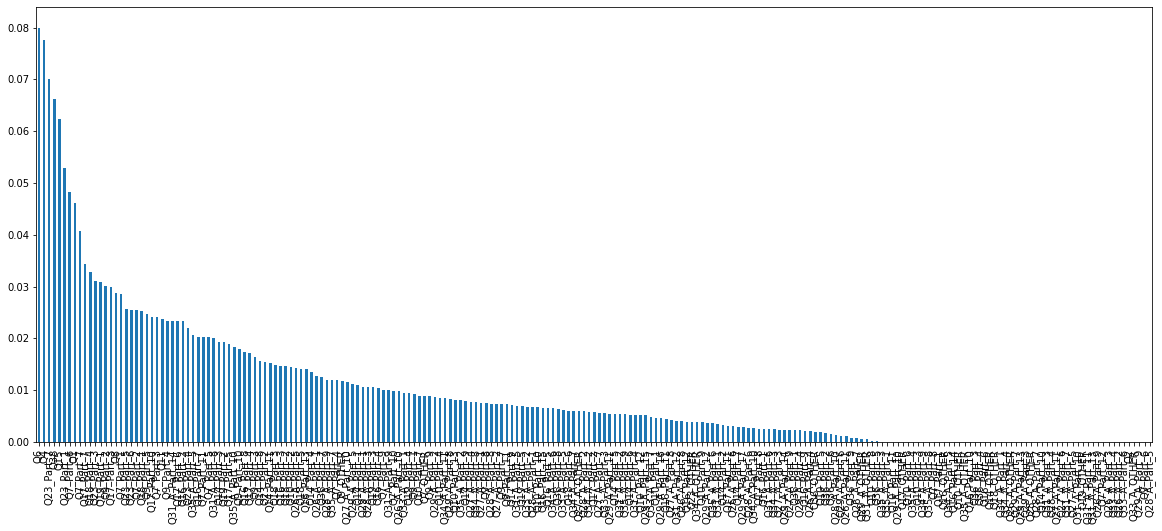

In [ ]:
mutual_info.sort_values(ascending=False).plot.bar(figsize=(20, 8))

In [ ]:
from sklearn.feature_selection import SelectKBest
sel_five_cols = SelectKBest(mutual_info_classif, k=10)
sel_five_cols.fit(X_train, y_train)
X_train.columns[sel_five_cols.get_support()]

Index(['Q1', 'Q4', 'Q6', 'Q15', 'Q38', 'Q7_Part_2', 'Q7_Part_6', 'Q7_Part_7',
       'Q17_Part_7', 'Q23_Part_7'],
      dtype='object')

In [ ]:
#creating a dataframe with important features from mutual information features method
df_mutual_info = df[['Q1', 'Q4', 'Q6', 'Q15', 'Q38', 'Q7_Part_2', 'Q7_Part_6', 'Q7_Part_7',
       'Q17_Part_7', 'Q23_Part_7']]
df_mutual_info

,Q1,Q4,Q6,Q15,Q38,Q7_Part_2,Q7_Part_6,Q7_Part_7,Q17_Part_7,Q23_Part_7
0,3,3,4,0,2,1,0,0,1,0
1,4,0,1,7,1,0,1,1,0,1
2,3,3,4,4,4,0,0,0,0,0
3,3,3,3,8,4,0,0,0,0,0
4,3,0,5,8,4,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
13189,0,3,3,8,4,0,0,0,0,0
13190,0,6,3,8,4,0,0,0,0,0
13191,3,3,5,7,4,0,0,0,0,0
13192,1,0,3,0,4,0,1,1,1,0


In [ ]:
#Assigning X,y from mutal information feature dataframe
X = df_mutual_info
y = df_final.target

Train,test split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [ ]:
#Random oversampling
rOs = RandomOverSampler()
X_ro, y_ro = rOs.fit_resample(X_train, y_train)
y_ro.value_counts()
print('Classes oversampled :', y_ro.value_counts())

Classes oversampled : 3     2779
5     2779
8     2779
2     2779
0     2779
9     2779
6     2779
4     2779
10    2779
7     2779
1     2779
Name: target, dtype: int64


In [ ]:
models = [('LR', LogisticRegression()),('KNN', KNeighborsClassifier()),('DT', DecisionTreeClassifier()),('RF', RandomForestClassifier()),('SVM', SVC())]
# evaluate each model in turn
results = []
for name, model in models:
    model.fit(X_ro, y_ro)
    y_pred = model.predict(X_test)
    score = (accuracy_score(y_test,y_pred)*100)
    results.append((name,score))
results_ro = pd.DataFrame(results, columns = ['Model', 'Random oversampling'])
results_ro.set_index('Model')

,Random oversampling
Model,
LR,25.994695
KNN,25.047366
DT,25.502084
RF,28.268283
SVM,27.396741


In [ ]:
#SMOTE
smo = SMOTE()
X_sm, y_sm = smo.fit_resample(X_train, y_train)

In [ ]:
models = [('LR', LogisticRegression()),('KNN', KNeighborsClassifier()),('DT', DecisionTreeClassifier()),('RF', RandomForestClassifier()),('SVM', SVC())]
# evaluate each model in turn
results = []
for name, model in models:
    model.fit(X_sm, y_sm)
    y_pred = model.predict(X_test)
    score = (accuracy_score(y_test,y_pred)*100)
    results.append((name,score))
results_sm = pd.DataFrame(results, columns = ['Model', 'Smote'])
results_sm.set_index('Model')

,Smote
Model,
LR,23.152709
KNN,28.457749
DT,26.487306
RF,29.821902
SVM,28.988253


In [ ]:
#ADASYN
from imblearn.over_sampling import ADASYN
ad = ADASYN()
X_ad, y_ad = ad.fit_resample(X_train, y_train)
print('Classes ADASYN :', y_ad.value_counts())

Classes ADASYN : 7     2964
8     2911
5     2813
4     2779
1     2758
3     2756
10    2751
2     2713
6     2683
9     2682
0     2665
Name: target, dtype: int64


In [ ]:
models = [('LR', LogisticRegression()),('KNN', KNeighborsClassifier()),('DT', DecisionTreeClassifier()),('RF', RandomForestClassifier()),('SVM', SVC())]
# evaluate each model in turn
results = []
for name, model in models:
    model.fit(X_ad, y_ad)
    y_pred = model.predict(X_test)
    score = (accuracy_score(y_test,y_pred)*100)
    results.append((name,score))
results_ad = pd.DataFrame(results, columns = ['Model', 'Adasyn'])
results_ad.set_index('Model')

,Adasyn
Model,
LR,24.706328
KNN,26.638878
DT,26.070481
RF,28.647215
SVM,28.988253


**Performances on Train and Test Set**

In [ ]:
model_evaluation_df = [results_ro, results_sm,results_ad]
from functools import reduce
model_evaluation = reduce(lambda left,right: pd.merge(left,right,on='Model'),model_evaluation_df)
print('-----------------------------------Resampling techniques-----------------------------------------')
model_evaluation

-----------------------------------Resampling techniques-----------------------------------------


,Model,Random oversampling,Smote,Adasyn
0,LR,25.994695,23.152709,24.706328
1,KNN,25.047366,28.457749,26.638878
2,DT,25.502084,26.487306,26.070481
3,RF,28.268283,29.821902,28.647215
4,SVM,27.396741,28.988253,28.988253


Among all the models tested with different resampling techniques, Random forest with Smote performs well.

**Hyperparameter tuning**


In [ ]:
rf = RandomForestClassifier()
param_grid_rf = {'max_features': ['sqrt', 'log2'],'min_samples_leaf': [1, 3, 5], 
             'n_estimators': [10, 50, 100, 250, 500, 1000]}
grid_rf = GridSearchCV(estimator=rf, param_grid = param_grid_rf, cv = 5)
grid_rf.fit(X_sm, y_sm)
print(pd.DataFrame.from_dict(grid_rf.cv_results_).loc[:,['params', 'mean_test_score']])

                                               params  mean_test_score
0   {'max_features': 'sqrt', 'min_samples_leaf': 1...         0.554877
1   {'max_features': 'sqrt', 'min_samples_leaf': 1...         0.561027
2   {'max_features': 'sqrt', 'min_samples_leaf': 1...         0.562270
3   {'max_features': 'sqrt', 'min_samples_leaf': 1...         0.564691
4   {'max_features': 'sqrt', 'min_samples_leaf': 1...         0.563382
5   {'max_features': 'sqrt', 'min_samples_leaf': 1...         0.563022
6   {'max_features': 'sqrt', 'min_samples_leaf': 3...         0.531029
7   {'max_features': 'sqrt', 'min_samples_leaf': 3...         0.543525
8   {'max_features': 'sqrt', 'min_samples_leaf': 3...         0.545128
9   {'max_features': 'sqrt', 'min_samples_leaf': 3...         0.543623
10  {'max_features': 'sqrt', 'min_samples_leaf': 3...         0.544474
11  {'max_features': 'sqrt', 'min_samples_leaf': 3...         0.544310
12  {'max_features': 'sqrt', 'min_samples_leaf': 5...         0.508751
13  {'

In [ ]:
print('Score:',grid_rf.best_score_)
print('Best parameters:', grid_rf.best_params_)
print('Best estimator:', grid_rf.best_estimator_)

Score: 0.5646905373507266
Best parameters: {'max_features': 'sqrt', 'min_samples_leaf': 1, 'n_estimators': 250}
Best estimator: RandomForestClassifier(max_features='sqrt', n_estimators=250)


In [ ]:
rf=RandomForestClassifier(max_features = 'sqrt', min_samples_leaf = 1, n_estimators = 250, random_state=0)
rf.fit(X_sm,y_sm)
print('Train score:', rf.score(X_sm, y_sm))
y_pred = rf.predict(X_test)
print('Confusion matrix:', confusion_matrix(y_test,y_pred))
print('Test score:', accuracy_score(y_test,y_pred))
print('classification report:', classification_report(y_test,y_pred))

Train score: 0.9663883735312306
Confusion matrix: [[ 23   0  30   6  32   6  16   3   1  14   2]
 [  0   0   2   1   2   0   3   2   0   6   0]
 [ 23   0  72   4  45   8  18  12   7  18   6]
 [  1   1   7  11  24   7   1   2   2  22   0]
 [  8   0  41   6 292  57  12   5  23  27   5]
 [  4   0  10   1  39  46   5   0  20  18   0]
 [ 11   1  34   2  37  14  87  19  32  24   5]
 [  9   0   9   5  26   4  20   7   5  16   0]
 [  7   0  10   3  43  18   7   3  61  18  10]
 [  7   2  23   4  51  30  23   9  10 170   4]
 [  5   1   7   0   5   0   3   1   5   1  13]]
Test score: 0.39494949494949494
classification report:               precision    recall  f1-score   support

           0       0.23      0.17      0.20       133
           1       0.00      0.00      0.00        16
           2       0.29      0.34      0.31       213
           3       0.26      0.14      0.18        78
           4       0.49      0.61      0.54       476
           5       0.24      0.32      0.28       14

The model built with Mutual Information Features shows a good accuracy score of 96% for training data whereas for test data the accuracy score is 39%. 

* Variance Threshold


In [ ]:
X = df_final.drop('target', axis = 1)
from sklearn.feature_selection import VarianceThreshold
varThresh = VarianceThreshold(threshold = 0.5)
varThresh.fit_transform(X)
#varThresh.get_support()#False must be removed

array([[3, 0, 3, ..., 2, 0, 2],
       [4, 0, 0, ..., 2, 7, 1],
       [3, 0, 3, ..., 0, 4, 4],
       ...,
       [3, 0, 3, ..., 2, 7, 4],
       [1, 0, 0, ..., 0, 0, 4],
       [1, 0, 3, ..., 0, 8, 4]])

In [ ]:
np.asarray(X.columns)[selector.get_support()]

array(['Q1', 'Q2', 'Q4', 'Q6', 'Q8', 'Q11', 'Q15', 'Q38', 'Q7_Part_1',
       'Q7_Part_2', 'Q7_Part_3', 'Q7_Part_4', 'Q7_Part_5', 'Q7_Part_6',
       'Q7_Part_7', 'Q7_OTHER', 'Q9_Part_1', 'Q9_Part_2', 'Q9_Part_3',
       'Q9_Part_4', 'Q9_Part_5', 'Q9_Part_6', 'Q9_Part_7', 'Q9_Part_8',
       'Q10_Part_1', 'Q10_Part_2', 'Q10_Part_13', 'Q14_Part_1',
       'Q14_Part_2', 'Q14_Part_3', 'Q14_Part_4', 'Q16_Part_1',
       'Q16_Part_2', 'Q16_Part_3', 'Q16_Part_4', 'Q16_Part_7',
       'Q17_Part_1', 'Q17_Part_2', 'Q17_Part_3', 'Q17_Part_4',
       'Q17_Part_6', 'Q17_Part_7', 'Q17_Part_9', 'Q18_Part_1',
       'Q18_Part_3', 'Q18_Part_4', 'Q19_Part_1', 'Q23_Part_1',
       'Q23_Part_2', 'Q23_Part_3', 'Q23_Part_4', 'Q23_Part_5',
       'Q23_Part_6', 'Q23_Part_7', 'Q26_A_Part_1', 'Q26_A_Part_2',
       'Q26_A_Part_3', 'Q26_A_Part_11', 'Q27_A_Part_1', 'Q28_A_Part_10',
       'Q29_A_Part_1', 'Q29_A_Part_2', 'Q29_A_Part_8', 'Q29_A_Part_17',
       'Q31_A_Part_2', 'Q31_A_Part_5', 'Q31_A_Part_14', 'Q33

In [ ]:
#creating a dataframe with important features from variance threshold method
df_varthres = df_final[['Q1', 'Q2', 'Q4', 'Q6', 'Q8', 'Q11', 'Q15', 'Q38', 'Q7_Part_1',
       'Q7_Part_2', 'Q7_Part_3', 'Q7_Part_4', 'Q7_Part_5', 'Q7_Part_6',
       'Q7_Part_7', 'Q7_OTHER', 'Q9_Part_1', 'Q9_Part_2', 'Q9_Part_3',
       'Q9_Part_4', 'Q9_Part_5', 'Q9_Part_6', 'Q9_Part_7', 'Q9_Part_8',
       'Q10_Part_1', 'Q10_Part_2', 'Q10_Part_13', 'Q14_Part_1',
       'Q14_Part_2', 'Q14_Part_3', 'Q14_Part_4', 'Q16_Part_1',
       'Q16_Part_2', 'Q16_Part_3', 'Q16_Part_4', 'Q16_Part_7',
       'Q17_Part_1', 'Q17_Part_2', 'Q17_Part_3', 'Q17_Part_4',
       'Q17_Part_6', 'Q17_Part_7', 'Q17_Part_9', 'Q18_Part_1',
       'Q18_Part_3', 'Q18_Part_4', 'Q19_Part_1', 'Q23_Part_1',
       'Q23_Part_2', 'Q23_Part_3', 'Q23_Part_4', 'Q23_Part_5',
       'Q23_Part_6', 'Q23_Part_7', 'Q26_A_Part_1', 'Q26_A_Part_2',
       'Q26_A_Part_3', 'Q26_A_Part_11', 'Q27_A_Part_1', 'Q28_A_Part_10',
       'Q29_A_Part_1', 'Q29_A_Part_2', 'Q29_A_Part_8', 'Q29_A_Part_17',
       'Q31_A_Part_2', 'Q31_A_Part_5', 'Q31_A_Part_14', 'Q33_A_Part_7',
       'Q35_A_Part_10', 'Q36_Part_4', 'Q36_Part_6', 'Q36_Part_9']]
df_varthres

,Q1,Q2,Q4,Q6,Q8,Q11,Q15,Q38,Q7_Part_1,Q7_Part_2,...,Q29_A_Part_8,Q29_A_Part_17,Q31_A_Part_2,Q31_A_Part_5,Q31_A_Part_14,Q33_A_Part_7,Q35_A_Part_10,Q36_Part_4,Q36_Part_6,Q36_Part_9
0,3,0,3,4,9,2,0,2,1,1,...,0,0,1,1,0,1,1,1,0,0
1,4,0,0,1,10,2,7,1,0,0,...,0,0,0,0,1,1,1,0,0,0
2,3,0,3,4,9,0,4,4,1,0,...,0,0,0,1,0,1,1,0,0,1
3,3,0,3,3,9,2,8,4,1,0,...,0,0,0,0,0,0,0,0,0,0
4,3,0,0,5,9,2,8,4,1,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13189,0,0,3,3,9,2,8,4,0,0,...,0,0,0,0,0,0,0,0,0,0
13190,0,0,6,3,9,2,8,4,0,0,...,0,0,0,0,0,0,0,0,0,0
13191,3,0,3,5,9,2,7,4,1,0,...,0,0,0,0,0,0,0,0,0,0
13192,1,0,0,3,9,0,0,4,1,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
#Assigning X,y from variance threshold feature dataframe
X = df_varthres
y = df_final.target

Train,test split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.15, random_state = 0)

In [ ]:
#Random oversampling
rOs = RandomOverSampler()
X_ro, y_ro = rOs.fit_resample(X_train, y_train)


In [ ]:
models = [('LR', LogisticRegression()),('KNN', KNeighborsClassifier()),('DT', DecisionTreeClassifier()),('RF', RandomForestClassifier()),('SVM', SVC())]
# evaluate each model in turn
results = []
for name, model in models:
    model.fit(X_ro, y_ro)
    y_pred = model.predict(X_test)
    score = (accuracy_score(y_test,y_pred)*100)
    results.append((name,score))
results_ro = pd.DataFrame(results, columns = ['Model', 'Random oversampling'])
results_ro.set_index('Model')

,Random oversampling
Model,
LR,33.535354
KNN,25.101010
DT,27.575758
RF,40.050505
SVM,34.545455


In [ ]:
#SMOTE
smo = SMOTE()
X_sm, y_sm = smo.fit_resample(X_train, y_train)

In [ ]:
models = [('LR', LogisticRegression()),('KNN', KNeighborsClassifier()),('DT', DecisionTreeClassifier()),('RF', RandomForestClassifier()),('SVM', SVC())]
# evaluate each model in turn
results = []
for name, model in models:
    model.fit(X_sm, y_sm)
    y_pred = model.predict(X_test)
    score = (accuracy_score(y_test,y_pred)*100)
    results.append((name,score))
results_ro = pd.DataFrame(results, columns = ['Model', 'Random oversampling'])
results_ro.set_index('Model')

,Random oversampling
Model,
LR,34.747475
KNN,24.494949
DT,26.616162
RF,39.747475
SVM,37.626263


In [ ]:
#ADASYN
from imblearn.over_sampling import ADASYN
ad = ADASYN()
X_ad, y_ad = ad.fit_resample(X_train, y_train)

In [ ]:
models = [('LR', LogisticRegression()),('KNN', KNeighborsClassifier()),('DT', DecisionTreeClassifier()),('RF', RandomForestClassifier()),('SVM', SVC())]
# evaluate each model in turn
results = []
for name, model in models:
    model.fit(X_ad, y_ad)
    y_pred = model.predict(X_test)
    score = (accuracy_score(y_test,y_pred)*100)
    results.append((name,score))
results_ad = pd.DataFrame(results, columns = ['Model', 'Adasyn'])
results_ad.set_index('Model')

,Adasyn
Model,
LR,34.545455
KNN,24.292929
DT,26.616162
RF,38.434343
SVM,37.424242


**Performances on Train and Test Set**

In [ ]:
model_evaluation_df = [results_ro, results_sm,results_ad]
from functools import reduce
model_evaluation = reduce(lambda left,right: pd.merge(left,right,on='Model'),model_evaluation_df)
print('-----------------------------------Resampling techniques-----------------------------------------')
model_evaluation

-----------------------------------Resampling techniques-----------------------------------------


,Model,Random oversampling,Smote,Adasyn
0,LR,34.747475,23.152709,34.545455
1,KNN,24.494949,28.457749,24.292929
2,DT,26.616162,26.487306,26.616162
3,RF,39.747475,29.821902,38.434343
4,SVM,37.626263,28.988253,37.424242


Hyperparameter tuning

In [ ]:
rf = RandomForestClassifier()
param_grid_rf = {'max_features': ['sqrt', 'log2'],'min_samples_leaf': [1, 3, 5], 
             'n_estimators': [10, 50, 100, 250, 500, 1000]}
grid_rf = GridSearchCV(estimator=rf, param_grid = param_grid_rf, cv = 5)
grid_rf.fit(X_ro, y_ro)
print(pd.DataFrame.from_dict(grid_rf.cv_results_).loc[:,['params', 'mean_test_score']])

                                               params  mean_test_score
0   {'max_features': 'sqrt', 'min_samples_leaf': 1...         0.898145
1   {'max_features': 'sqrt', 'min_samples_leaf': 1...         0.912430
2   {'max_features': 'sqrt', 'min_samples_leaf': 1...         0.915182
3   {'max_features': 'sqrt', 'min_samples_leaf': 1...         0.916296
4   {'max_features': 'sqrt', 'min_samples_leaf': 1...         0.917409
5   {'max_features': 'sqrt', 'min_samples_leaf': 1...         0.917378
6   {'max_features': 'sqrt', 'min_samples_leaf': 3...         0.825943
7   {'max_features': 'sqrt', 'min_samples_leaf': 3...         0.867563
8   {'max_features': 'sqrt', 'min_samples_leaf': 3...         0.873191
9   {'max_features': 'sqrt', 'min_samples_leaf': 3...         0.876005
10  {'max_features': 'sqrt', 'min_samples_leaf': 3...         0.877335
11  {'max_features': 'sqrt', 'min_samples_leaf': 3...         0.879004
12  {'max_features': 'sqrt', 'min_samples_leaf': 5...         0.774150
13  {'

In [ ]:
print('Score:',grid_rf.best_score_)
print('Best parameters:', grid_rf.best_params_)
print('Best estimator:', grid_rf.best_estimator_)

Score: 0.9188311688311689
Best parameters: {'max_features': 'log2', 'min_samples_leaf': 1, 'n_estimators': 500}
Best estimator: RandomForestClassifier(max_features='log2', n_estimators=500)


In [ ]:
rf=RandomForestClassifier(max_features = 'log2', min_samples_leaf = 1, n_estimators = 500, random_state=0)
rf.fit(X_ro,y_ro)
print('Train score:', rf.score(X_ro, y_ro))
y_pred = rf.predict(X_test)
print('Confusion matrix:', confusion_matrix(y_test,y_pred))
print('Test score:', accuracy_score(y_test,y_pred))
print('classification report:', classification_report(y_test,y_pred))

Train score: 0.9852195423623995
Confusion matrix: [[ 14   0  44   0  32   3  21   1   3  12   3]
 [  0   0   3   1   3   0   3   1   0   5   0]
 [ 12   0  75   2  55   6  25   8   8  21   1]
 [  1   0  11   5  32   4   0   1   0  24   0]
 [  4   0  40   4 322  43  17   1  21  22   2]
 [  3   0  12   2  45  36   6   0  15  24   0]
 [  7   0  41   0  39  12  93   9  29  31   5]
 [  5   1  13   1  29   3  20   7   4  18   0]
 [  3   0  13   0  42  12  17   1  73  15   4]
 [  4   2  26   1  57  26  26   6  12 171   2]
 [  3   1   8   0   7   0   4   1   5   2  10]]
Test score: 0.4070707070707071
classification report:               precision    recall  f1-score   support

           0       0.25      0.11      0.15       133
           1       0.00      0.00      0.00        16
           2       0.26      0.35      0.30       213
           3       0.31      0.06      0.11        78
           4       0.49      0.68      0.57       476
           5       0.25      0.25      0.25       143

The model built with a variance threshold shows good accuracy 98% whereas it show 40%  accuracy score for test data.

 **PCA**

PCA is used to address the overfitting problem.

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
X = df_varthres
y = df_final.target
scaler = StandardScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=0.9)
X_pca = pca.fit_transform(X_scaled)

In [ ]:
X_train_pca, X_test_pca, y_train, y_test = train_test_split(X_pca, y, test_size=0.10, 
                                                    random_state=2)

In [ ]:
models = [('LR', LogisticRegression()),('KNN', KNeighborsClassifier()),('DT', DecisionTreeClassifier()),('RF', RandomForestClassifier()),('SVM', SVC())]
# evaluate each model in turn
train_score_pca = []
test_score_pca= []
class_report_pca = pd.DataFrame()

for name, model in models:
    model.fit(X_train_pca, y_train)
    train_accuracy= accuracy_score(y_train, model.predict(X_train_pca))
    train_score_pca.append((name,train_accuracy))
    y_pred = model.predict(X_test_pca)
    test_accuracy = accuracy_score(y_test,y_pred)
    test_score_pca.append((name,test_accuracy))
    class_report = classification_report(y_test,y_pred,output_dict=True)
    class_report = pd.DataFrame(class_report)
    class_report_pca = class_report_pca.append(class_report.iloc[:3,:11])  
results_pca_train = pd.DataFrame(train_score_pca, columns = ['Model', 'Pca_train'])
results_pca_test = pd.DataFrame(test_score_pca, columns = ['Model', 'Pca_test'])
results_pca = pd.merge(results_pca_train, results_pca_test, on='Model')
print(results_pca)
print(class_report_pca)

  Model  Pca_train  Pca_test
0    LR   0.397423  0.400758
1   KNN   0.508506  0.342424
2    DT   0.830386  0.300000
3    RF   0.830386  0.376515
4   SVM   0.456375  0.414394
                  0    1         2         3         4         5         6  \
precision  0.125000  0.0  0.326531  0.000000  0.413846  0.315789  0.359756   
recall     0.013889  0.0  0.324324  0.000000  0.788856  0.116505  0.341040   
f1-score   0.025000  0.0  0.325424  0.000000  0.542886  0.170213  0.350148   
precision  0.087379  0.0  0.244681  0.095238  0.480851  0.246575  0.315152   
recall     0.125000  0.0  0.310811  0.051282  0.662757  0.174757  0.300578   
f1-score   0.102857  0.0  0.273810  0.066667  0.557337  0.204545  0.307692   
precision  0.106061  0.0  0.229730  0.000000  0.485564  0.229885  0.219251   
recall     0.097222  0.0  0.344595  0.000000  0.542522  0.194175  0.236994   
f1-score   0.101449  0.0  0.275676  0.000000  0.512465  0.210526  0.227778   
precision  0.200000  0.0  0.291139  0.076923  

There is no improvement in the test data accuracy  after doing PCA.

In [ ]:
from xgboost import XGBClassifier
X = df_varthres
y = df_final.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=0)
model = XGBClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
predictions = [round(value) for value in y_pred]
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 43.23%


From the model xgboost, the accuracy score of the test data is 43.23% which is better than Random Forest and PCA.

*   Chi square


In [ ]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import SelectPercentile
from sklearn.feature_selection import chi2
from sklearn.feature_selection import f_classif
X = df_final.drop('target',axis = 1)
y = df_final.target
chi2_selector = SelectKBest(chi2,k = 10)#selecting top 10
kBest = chi2_selector.fit_transform(X,y)
chi2_scores = pd.DataFrame(list(zip(df_final.columns,chi2_selector.scores_)), columns = ['Feature', 'Score'])
chi2_scores

,Feature,Score
0,Q1,1576.684199
1,Q2,381.440402
2,Q4,152.853573
3,Q6,216.129468
4,Q8,64.637456
...,...,...
212,Q36_Part_6,52.293924
213,Q36_Part_7,136.763789
214,Q36_Part_8,106.867358
215,Q36_Part_9,39.021139


In [ ]:
print('number of original features:', X.shape[1])
print('number of reduced features:', kBest.shape[1])

number of original features: 217
number of reduced features: 10


In [ ]:
np.asarray(X.columns)[chi2_selector.get_support()]# top 10 features

array(['Q1', 'Q15', 'Q7_Part_2', 'Q7_Part_6', 'Q7_Part_7', 'Q17_Part_7',
       'Q18_Part_4', 'Q23_Part_5', 'Q23_Part_6', 'Q23_Part_7'],
      dtype=object)

In [ ]:
chi2_selector = SelectPercentile(f_classif)#selecting top 10
kBest = chi2_selector.fit_transform(X,y)
chi2_scores = pd.DataFrame(list(zip(df_final.columns,chi2_selector.scores_)), columns = ['Feature', 'Score'])

In [ ]:
print('number of original features:', X.shape[1])
print('number of reduced features:', kBest.shape[1])

number of original features: 217
number of reduced features: 22


In [ ]:
np.asarray(X.columns)[chi2_selector.get_support()]

array(['Q1', 'Q38', 'Q7_Part_2', 'Q7_Part_3', 'Q7_Part_6', 'Q7_Part_7',
       'Q9_Part_2', 'Q9_Part_4', 'Q16_Part_2', 'Q16_Part_3', 'Q17_Part_3',
       'Q17_Part_6', 'Q17_Part_7', 'Q18_Part_1', 'Q18_Part_3',
       'Q18_Part_4', 'Q23_Part_1', 'Q23_Part_3', 'Q23_Part_4',
       'Q23_Part_5', 'Q23_Part_6', 'Q23_Part_7'], dtype=object)

In [ ]:
chi2_scores.sort_values(by = 'Score', ascending = False)

,Feature,Score
106,Q23_Part_7,186.380107
14,Q7_Part_7,147.069099
0,Q1,115.094843
13,Q7_Part_6,109.075302
9,Q7_Part_2,101.786585
...,...,...
149,Q29_A_Part_7,1.322292
167,Q31_A_Part_7,1.073955
192,Q34_A_Part_9,0.978085
183,Q33_A_OTHER,0.737852


In [ ]:
#creating a dataframe with important features from chi2 method
df_chi2 = df_final[['Q1', 'Q38', 'Q7_Part_2', 'Q7_Part_3', 'Q7_Part_6', 'Q7_Part_7',
       'Q9_Part_2', 'Q9_Part_4', 'Q16_Part_2', 'Q16_Part_3', 'Q17_Part_3',
       'Q17_Part_6', 'Q17_Part_7', 'Q18_Part_1', 'Q18_Part_3',
       'Q18_Part_4', 'Q23_Part_1', 'Q23_Part_3', 'Q23_Part_4',
       'Q23_Part_5', 'Q23_Part_6', 'Q23_Part_7']]
df_chi2

,Q1,Q38,Q7_Part_2,Q7_Part_3,Q7_Part_6,Q7_Part_7,Q9_Part_2,Q9_Part_4,Q16_Part_2,Q16_Part_3,...,Q17_Part_7,Q18_Part_1,Q18_Part_3,Q18_Part_4,Q23_Part_1,Q23_Part_3,Q23_Part_4,Q23_Part_5,Q23_Part_6,Q23_Part_7
0,3,2,1,1,0,0,0,0,1,1,...,1,0,0,1,1,0,0,0,1,0
1,4,1,0,0,1,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
2,3,4,0,1,0,0,0,0,1,1,...,0,0,0,0,1,0,1,1,0,0
3,3,4,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,3,4,1,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13189,0,4,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
13190,0,4,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
13191,3,4,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
13192,1,4,0,1,1,1,1,1,1,1,...,1,1,1,1,1,0,1,0,0,0


In [ ]:
#Assigning X,y from chi2 dataframe
X = df_chi2
y = df_final.target

**Train, test split**

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.15, random_state = 0)

# Resampling techniques for imbalanced data

In [ ]:
#Random oversampling
rOs = RandomOverSampler()
X_ro, y_ro = rOs.fit_resample(X_train, y_train)
y_ro.value_counts()
print('Classes oversampled :', y_ro.value_counts())

Classes oversampled : 9     2940
2     2940
0     2940
4     2940
6     2940
5     2940
8     2940
10    2940
3     2940
7     2940
1     2940
Name: target, dtype: int64


In [ ]:
models = [('LR', LogisticRegression()),('KNN', KNeighborsClassifier()),('DT', DecisionTreeClassifier()),('RF', RandomForestClassifier()),('SVM', SVC())]
# evaluate each model in turn
results = []
for name, model in models:
    model.fit(X_ro, y_ro)
    y_pred = model.predict(X_test)
    score = (accuracy_score(y_test,y_pred)*100)
    results.append((name,score))
results_ro = pd.DataFrame(results, columns = ['Model', 'Random oversampling'])
results_ro.set_index('Model')

,Random oversampling
Model,
LR,30.757576
KNN,23.535354
DT,28.838384
RF,31.060606
SVM,30.202020


In [ ]:
#SMOTE
smo = SMOTE()
X_sm, y_sm = smo.fit_resample(X_train, y_train)

In [ ]:
models = [('LR', LogisticRegression()),('KNN', KNeighborsClassifier()),('DT', DecisionTreeClassifier()),('RF', RandomForestClassifier()),('SVM', SVC())]
# evaluate each model in turn
results = []
for name, model in models:
    model.fit(X_sm, y_sm)
    y_pred = model.predict(X_test)
    score = (accuracy_score(y_test,y_pred)*100)
    results.append((name,score))
results_ro = pd.DataFrame(results, columns = ['Model', 'Random oversampling'])
results_ro.set_index('Model')

,Random oversampling
Model,
LR,27.828283
KNN,22.979798
DT,26.010101
RF,31.666667
SVM,33.484848


In [ ]:
#ADASYN
from imblearn.over_sampling import ADASYN
ad = ADASYN()
X_ad, y_ad = ad.fit_resample(X_train, y_train)
print('Classes ADASYN :', y_ad.value_counts())

Classes ADASYN : 7     3173
5     3052
3     2981
4     2940
1     2931
10    2906
9     2875
0     2869
6     2848
2     2840
8     2730
Name: target, dtype: int64


In [ ]:
models = [('LR', LogisticRegression()),('KNN', KNeighborsClassifier()),('DT', DecisionTreeClassifier()),('RF', RandomForestClassifier()),('SVM', SVC())]
# evaluate each model in turn
results = []
for name, model in models:
    model.fit(X_ad, y_ad)
    y_pred = model.predict(X_test)
    score = (accuracy_score(y_test,y_pred)*100)
    results.append((name,score))
results_ro = pd.DataFrame(results, columns = ['Model', 'Random oversampling'])
results_ro.set_index('Model')

,Random oversampling
Model,
LR,27.474747
KNN,23.989899
DT,25.050505
RF,30.252525
SVM,32.373737


**Performances on Train and Test Set**

In [ ]:
model_evaluation_df = [results_ro, results_sm,results_ad]
from functools import reduce
model_evaluation = reduce(lambda left,right: pd.merge(left,right,on='Model'),model_evaluation_df)
print('-----------------------------------Resampling techniques-----------------------------------------')
model_evaluation

-----------------------------------Resampling techniques-----------------------------------------


,Model,Random oversampling,Smote,Adasyn
0,LR,27.474747,23.152709,34.545455
1,KNN,23.989899,28.457749,24.292929
2,DT,25.050505,26.487306,26.616162
3,RF,30.252525,29.821902,38.434343
4,SVM,32.373737,28.988253,37.424242


**Hyperparameter tuning**

In [ ]:
rf = RandomForestClassifier()
param_grid_rf = {'max_features': ['sqrt', 'log2'],'min_samples_leaf': [1, 3, 5], 
             'n_estimators': [10, 50, 100, 250, 500, 1000]}
grid_rf = GridSearchCV(estimator=rf, param_grid = param_grid_rf, cv = 5)
grid_rf.fit(X_ad, y_ad)
print(pd.DataFrame.from_dict(grid_rf.cv_results_).loc[:,['params', 'mean_test_score']])

                                               params  mean_test_score
0   {'max_features': 'sqrt', 'min_samples_leaf': 1...         0.477555
1   {'max_features': 'sqrt', 'min_samples_leaf': 1...         0.492954
2   {'max_features': 'sqrt', 'min_samples_leaf': 1...         0.495069
3   {'max_features': 'sqrt', 'min_samples_leaf': 1...         0.496531
4   {'max_features': 'sqrt', 'min_samples_leaf': 1...         0.496656
5   {'max_features': 'sqrt', 'min_samples_leaf': 1...         0.496220
6   {'max_features': 'sqrt', 'min_samples_leaf': 3...         0.439788
7   {'max_features': 'sqrt', 'min_samples_leaf': 3...         0.455841
8   {'max_features': 'sqrt', 'min_samples_leaf': 3...         0.461191
9   {'max_features': 'sqrt', 'min_samples_leaf': 3...         0.461689
10  {'max_features': 'sqrt', 'min_samples_leaf': 3...         0.461254
11  {'max_features': 'sqrt', 'min_samples_leaf': 3...         0.462187
12  {'max_features': 'sqrt', 'min_samples_leaf': 5...         0.413532
13  {'

In [ ]:
print('Score:',grid_rf.best_score_)
print('Best parameters:', grid_rf.best_params_)
print('Best estimator:', grid_rf.best_estimator_)

Score: 0.4967179965780059
Best parameters: {'max_features': 'log2', 'min_samples_leaf': 1, 'n_estimators': 1000}
Best estimator: RandomForestClassifier(max_features='log2', n_estimators=1000)


In [ ]:
rf=RandomForestClassifier(max_features = 'log2', min_samples_leaf = 1, n_estimators = 1000, random_state=0)
rf.fit(X_ad,y_ad)
print('Train score:', rf.score(X_ad, y_ad))
y_pred = rf.predict(X_test)
print('Confusion matrix:', confusion_matrix(y_test,y_pred))
print('Test score:', accuracy_score(y_test,y_pred))
print('classification report:', classification_report(y_test,y_pred))

Train score: 0.7136102037641935
Confusion matrix: [[ 18   2  21  13  20   3  21   9   9   7  10]
 [  0   2   3   1   3   0   3   0   0   4   0]
 [ 26  11  33  15  28  15  20  13  11  22  19]
 [  2   4  13   8  19   8   3   4   1  16   0]
 [ 20   8  41  20 242  48  18  23  27  19  10]
 [  5   0   5   5  33  38  10   3  19  24   1]
 [ 24  11  13   2  41  16  66  32  22  23  16]
 [ 10   4   5   8  20   8  14  14   3  10   5]
 [ 11   2   5   5  37  23  13   8  51  14  11]
 [  7   7  19  16  58  34  34  15  18 120   5]
 [  4   2   4   2   3   1   5   1   5   0  14]]
Test score: 0.30606060606060603
classification report:               precision    recall  f1-score   support

           0       0.14      0.14      0.14       133
           1       0.04      0.12      0.06        16
           2       0.20      0.15      0.18       213
           3       0.08      0.10      0.09        78
           4       0.48      0.51      0.49       476
           5       0.20      0.27      0.23       14

The model built with a chi-square technique shows less accuracy (71% ) for training data and the accuracy score for test data is only 30%.